# Flipkart Mobile DataSet Analysis

In this notebook we will analyse the given dataset and try find insights from the given data 

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv("data.csv")
df.head()

,Unnamed: 0,Name,Price,Model Name,Color,SIM Type,Touchscreen,Display Size,Resolution,Operating System,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,0,"SAMSUNG Galaxy F13 (Nightsky Green, 64 GB) (4...","₹9,799",Galaxy F13,Nightsky Green,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,...,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,1,"SAMSUNG Galaxy F13 (Sunrise Copper, 64 GB) (4...","₹9,799",Galaxy F13,Sunrise Copper,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,...,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,2,"SAMSUNG Galaxy F13 (Waterfall Blue, 64 GB) (4...","₹9,799",Galaxy F13,Waterfall Blue,Dual Sim,Yes,16.76 cm (6.6 inch),2408 x 1080 Pixels,Android 12,...,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,3,"REDMI 10 (Pacific Blue, 64 GB) (4 GB RAM)","₹9,999",10,Pacific Blue,Dual Sim,Yes,17.02 cm (6.7 inch),1650 x 720 Pixels,Android 11,...,3.5mm,Yes,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,4,"APPLE iPhone 13 (Starlight, 128 GB)","₹58,999",iPhone 13,Starlight,Dual Sim,Yes,15.49 cm (6.1 inch),2532 x 1170 Pixels,iOS 15,...,3.5mm,Yes,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


### Data Preprocessing

First we will work with numeric data so we will drop all categorical data

In [2]:
df.isnull().sum()

Unnamed: 0                     0
Name                           4
Price                          0
Model Name                     1
Color                          1
SIM Type                       1
Touchscreen                    1
Display Size                   1
Resolution                     1
Operating System               1
Processor Core                 2
Primary Clock Speed            2
Internal Storage               3
RAM                            1
Primary Camera Available       2
Primary Camera                 1
Secondary Camera Available     2
Secondary Camera               2
Full HD Recording              3
Network Type                   1
Bluetooth Support             25
Wi-Fi                          6
Audio Jack                    27
GPS Support                    2
Battery Capacity               1
Weight                         2
Domestic Warranty             25
Product Rating                 0
Camera Rating                  0
Battery Rating                 0
Display Ra

In [3]:
df.drop(["Unnamed: 0","Name","Model Name","Color","Display Size","Resolution","Operating System","Primary Camera","Secondary Camera","Network Type"],axis=1,inplace=True)
df.head()

,Price,SIM Type,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,"₹9,799",Dual Sim,Yes,Octa Core,2 GHz,64 GB,4 GB,Yes,Yes,Yes,...,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,"₹9,799",Dual Sim,Yes,Octa Core,2 GHz,64 GB,4 GB,Yes,Yes,Yes,...,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,"₹9,799",Dual Sim,Yes,Octa Core,2 GHz,64 GB,4 GB,Yes,Yes,Yes,...,3.5mm,Yes,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,"₹9,999",Dual Sim,Yes,Octa Core,2.4 GHz,64 GB,4 GB,Yes,Yes,Yes,...,3.5mm,Yes,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,"₹58,999",Dual Sim,Yes,Hexa Core,2.4 GHz,128 GB,4 GB,Yes,Yes,Yes,...,3.5mm,Yes,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


The features SIM Type, Touchscreen, Primary Camera Available, Secondary Camera Avaialble etc are not numeric but can be converted into numeric

In [4]:
print("SIM Type : ",df["SIM Type"].unique())
print("Touchscreen : ",df["Touchscreen"].unique())
print("Processor Core : ",df["Processor Core"].unique())
print("Primary Camera Available : ",df["Primary Camera Available"].unique())
print("Secondary Camera Available : ",df["Secondary Camera Available"].unique())
print("Full HD Recording : ",df["Full HD Recording"].unique())
print("Bluetooth Support : ",df["Bluetooth Support"].unique())
print("Wi-Fi : ",df["Wi-Fi"].unique())
print("GPS Support : ",df["GPS Support"].unique())

SIM Type :  ['Dual Sim' 'Single Sim' nan 'Dual Sim(Nano + eSIM)']
Touchscreen :  ['Yes' 'No' nan]
Processor Core :  ['Octa Core' 'Hexa Core' 'Quad Core' nan 'Single Core']
Primary Camera Available :  ['Yes' 'No' nan]
Secondary Camera Available :  ['Yes' 'No' nan]
Full HD Recording :  ['Yes' 'No' nan]
Bluetooth Support :  ['Yes' 'No' nan]
Wi-Fi :  ['Yes' 'No' nan]
GPS Support :  ['Yes' 'No' nan]


In [5]:
df["Touchscreen"].replace(["Yes","No"],[1,0],inplace=True)
df["Processor Core"].replace(["Octa Core","Hexa Core","Quad Core","Single Core"],[8,6,4,1],inplace=True)
df["Primary Camera Available"].replace(["Yes","No"],[1,0],inplace=True)
df["Secondary Camera Available"].replace(["Yes","No"],[1,0],inplace=True)
df["Full HD Recording"].replace(["Yes","No"],[1,0],inplace=True)
df["Bluetooth Support"].replace(["Yes","No"],[1,0],inplace=True)
df["Wi-Fi"].replace(["Yes","No"],[1,0],inplace=True)
df["GPS Support"].replace(["Yes","No"],[1,0],inplace=True)
df.head()

,Price,SIM Type,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,"₹9,799",Dual Sim,1.0,8.0,2 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,"₹9,799",Dual Sim,1.0,8.0,2 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,"₹9,799",Dual Sim,1.0,8.0,2 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,"₹9,999",Dual Sim,1.0,8.0,2.4 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,"₹58,999",Dual Sim,1.0,6.0,2.4 GHz,128 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


In [6]:
df["SIM Type"].replace(["Dual Sim","Single Sim","Dual Sim(Nano + eSIM)"],[2,1,2],inplace=True)
df.rename(columns={"SIM Type":"No of Sim"},inplace=True)
df.head()

,Price,No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,"₹9,799",2.0,1.0,8.0,2 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,"₹9,799",2.0,1.0,8.0,2 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,"₹9,799",2.0,1.0,8.0,2 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,"₹9,999",2.0,1.0,8.0,2.4 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,"₹58,999",2.0,1.0,6.0,2.4 GHz,128 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


Now that we have converted some features into numeric type, we will remove units from entries

In [7]:
# Removing Ruppe Sign from Price Column Entries
df["Price"] = pd.to_numeric(df["Price"].apply(lambda x:x[1:]).str.replace(",",""))
df.rename(columns={"Price":"Price (Rs)"},inplace=True)
df.head()

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,9799.0,2.0,1.0,8.0,2 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,9799.0,2.0,1.0,8.0,2 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,9799.0,2.0,1.0,8.0,2 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,9999.0,2.0,1.0,8.0,2.4 GHz,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,58999.0,2.0,1.0,6.0,2.4 GHz,128 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


In [8]:
print(df["Primary Clock Speed"].unique())

['2 GHz' '2.4 GHz' '1.82 GHz' '0.208 GHz' '2.2 GHz' '2.3 GHz' '1.6 GHz'
 '2.05 GHz' nan '2.8 GHz' '1.8 GHz' '1.8 MHz' '2.6 GHz' '208 MHz' '1 MHz'
 '1 GHz' '1.2 MHz' '2.2 MHz']


Here the feature  primary clock speed has values with different units to we have to be careful while converting it to numeric type

In [9]:
def getClockSpeed(speed):
    if speed != speed:
        return speed
    number,unit = speed.split(" ")
    if unit == "Mhz":
        number *= 0.001
    return number

df["Primary Clock Speed"] = pd.to_numeric(df["Primary Clock Speed"].apply(getClockSpeed))
df.rename(columns={"Primary Clock Spee":"Primary Clock Speed (GHz)"},inplace=True)
df.head()

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage,RAM,Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,9799.0,2.0,1.0,8.0,2.0,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,9799.0,2.0,1.0,8.0,2.0,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,9799.0,2.0,1.0,8.0,2.0,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,9999.0,2.0,1.0,8.0,2.4,64 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,58999.0,2.0,1.0,6.0,2.4,128 GB,4 GB,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


In [10]:
print("Internal Storage : ",df["Internal Storage"].unique())
print("RAM : ",df["RAM"].unique())

Internal Storage :  ['64 GB' '128 GB' '32 GB' '32 MB' nan '4 MB' '0 GB' '128 MB' '0 MB' '3 MB'
 '64 MB' '256 GB']
RAM :  ['4 GB' '8 GB' '6 GB' '2 GB' '32 MB' '3 GB' nan '4 MB' '64 MB']


In [11]:
def getSize(size):
    if size != size:
        return size
    number,unit = size.split(" ")
    number = float(number)
    if unit == "MB":
        number *= 0.001
    return number

df["Internal Storage"] = pd.to_numeric(df["Internal Storage"].apply(getSize))
df["RAM"] = pd.to_numeric(df["RAM"].apply(getSize))
df.rename(columns={"Internal Storage":"Internal Storage(GB)","RAM":"RAM (GB)"},inplace=True)
df.head()

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,9999.0,2.0,1.0,8.0,2.4,64.0,4.0,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,58999.0,2.0,1.0,6.0,2.4,128.0,4.0,1.0,1.0,1.0,...,3.5mm,1.0,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


In [12]:
df["Audio Jack"].unique()

array(['3.5mm', 'Yes', nan, '3.5 mm', '3.5'], dtype=object)

For Audio Jack we just have a binary data indicating whether mobile has a jack or not

In [13]:
import numpy as np
df["Audio Jack"].replace(["3.5mm","Yes","3.5 mm","3.5",np.nan],[1,1,1,1,0],inplace=True)
df.head()

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Battery Capacity,Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000 mAh,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,9999.0,2.0,1.0,8.0,2.4,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000 mAh,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,58999.0,2.0,1.0,6.0,2.4,128.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000 mAh,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


In [14]:
df["Battery Capacity"].unique()

array(['6000 mAh', '5000 mAh', '800 mAh', nan, '4410 mAh', '1000 mAh',
       '1750 mAh', '2500 mAh', '1020 mAh', '4600 mAh', '620 mAh',
       '400 mAh'], dtype=object)

In [15]:
def getBatteryCapacity(capacity):
    if capacity != capacity:
        return capacity
    number,unit = capacity.split(" ")
    return number
df["Battery Capacity"] = pd.to_numeric(df["Battery Capacity"].apply(getBatteryCapacity))
df.rename(columns={"Battery Capacity":"Batter Capacity(mAh)"},inplace=True)
df.head()

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Batter Capacity(mAh),Weight,Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
1,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
2,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,207 g,1 Year,4.4,3.7,4.2,4.0,4.0
3,9999.0,2.0,1.0,8.0,2.4,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,203 g,1 Year,4.3,3.6,4.1,3.9,3.9
4,58999.0,2.0,1.0,6.0,2.4,128.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,203 g,1 Year,4.7,4.6,4.4,4.7,4.6


In [16]:
df["Weight"].unique()

array(['207 g', '203 g', '173 g', '194 g', '189.5 g', '205 g', '182 g',
       '51 g', '192 g', '169 g', '180 g', '184 g', '190 g', '210 g',
       '200 g', '195 g', '179.5 g', '220 g', nan, '0.192 g', '178 g',
       '198 g', '186 g', '188 g', '187 g', '181 g', '74.98 g', '204 g',
       '109 g', '110 g', '90.5 g', '91.3 g', '201 g', '81.9 g', '189 g',
       '172 g', '72 g'], dtype=object)

In [17]:
def getWeight(weight):
    if weight != weight:
        return weight
    number,unit = weight.split(" ")
    return number

df["Weight"] = pd.to_numeric(df["Weight"].apply(getWeight))
df.rename(columns={"Weight":"Weight (gms)"},inplace=True)
df.head()

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty,Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,207.0,1 Year,4.4,3.7,4.2,4.0,4.0
1,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,207.0,1 Year,4.4,3.7,4.2,4.0,4.0
2,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,207.0,1 Year,4.4,3.7,4.2,4.0,4.0
3,9999.0,2.0,1.0,8.0,2.4,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,203.0,1 Year,4.3,3.6,4.1,3.9,3.9
4,58999.0,2.0,1.0,6.0,2.4,128.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,203.0,1 Year,4.7,4.6,4.4,4.7,4.6


In [18]:
df["Domestic Warranty"].unique()

array(['1 Year', nan, '0', '12 Months', '2 Year'], dtype=object)

In [19]:
def getYear(time):
    if time != time:
        return time
    if time == "0":
        return 0
    number,unit = time.split(" ")
    if unit == "Months":
        number = int(number) // 12
    return number

df["Domestic Warranty"] = pd.to_numeric(df["Domestic Warranty"].apply(getYear))
df.rename(columns={"Domestic Warranty":"Domestic Warranty(Years)"},inplace=True)
df.head()

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
0,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,207.0,1.0,4.4,3.7,4.2,4.0,4.0
1,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,207.0,1.0,4.4,3.7,4.2,4.0,4.0
2,9799.0,2.0,1.0,8.0,2.0,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,207.0,1.0,4.4,3.7,4.2,4.0,4.0
3,9999.0,2.0,1.0,8.0,2.4,64.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,203.0,1.0,4.3,3.6,4.1,3.9,3.9
4,58999.0,2.0,1.0,6.0,2.4,128.0,4.0,1.0,1.0,1.0,...,1.0,1.0,6000.0,203.0,1.0,4.7,4.6,4.4,4.7,4.6


Since now we have only numeric features we will try to understand realtionship between them

In [20]:
df.describe()

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
count,220.000000,223.000000,223.000000,222.000000,222.000000,221.000000,223.000000,222.000000,222.000000,221.000000,...,224.000000,222.000000,223.000000,222.000000,199.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,12872.781818,1.986547,0.865471,7.144144,3.969658,85.867864,4.290027,0.941441,0.932432,0.895928,...,0.879464,0.909910,4737.802691,159.562324,0.989950,4.191071,3.333482,3.762054,3.735268,3.792857
std,11325.586290,0.115463,0.341988,1.503220,19.502826,48.707239,2.397314,0.235327,0.251570,0.306048,...,0.326316,0.286958,1515.056303,62.778170,0.141776,0.592865,1.002550,1.031885,1.041970,1.047758
min,899.000000,1.000000,0.000000,1.000000,0.208000,0.000000,0.004000,0.000000,0.000000,0.000000,...,0.000000,0.000000,400.000000,0.192000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7374.000000,2.000000,1.000000,6.000000,2.000000,64.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5000.000000,173.000000,1.000000,4.200000,3.200000,3.900000,3.800000,3.900000
50%,10499.000000,2.000000,1.000000,8.000000,2.300000,128.000000,4.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5000.000000,184.000000,1.000000,4.200000,3.600000,4.100000,4.000000,4.000000
75%,15246.750000,2.000000,1.000000,8.000000,2.400000,128.000000,6.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,6000.000000,192.000000,1.000000,4.400000,3.900000,4.200000,4.200000,4.200000
max,71999.000000,2.000000,1.000000,8.000000,208.000000,256.000000,8.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,6000.000000,220.000000,2.000000,4.800000,4.600000,4.400000,4.700000,4.700000


In [21]:
df.isnull().sum()

Price (Rs)                     4
No of Sim                      1
Touchscreen                    1
Processor Core                 2
Primary Clock Speed            2
Internal Storage(GB)           3
RAM (GB)                       1
Primary Camera Available       2
Secondary Camera Available     2
Full HD Recording              3
Bluetooth Support             25
Wi-Fi                          6
Audio Jack                     0
GPS Support                    2
Batter Capacity(mAh)           1
Weight (gms)                   2
Domestic Warranty(Years)      25
Product Rating                 0
Camera Rating                  0
Battery Rating                 0
Display Rating                 0
Design Rating                  0
dtype: int64

Now we will fill in missing values

In [22]:
df["Price (Rs)"].fillna(df["Price (Rs)"].mean(),inplace=True)
df["Price (Rs)"].isnull().sum()

0

In [23]:
# Since no of means has a value of 1.98 we can substitue missing value for no of sim with
df["No of Sim"].fillna(2,inplace=True)
df["No of Sim"].isnull().sum()

0

<AxesSubplot: xlabel='Price (Rs)', ylabel='Touchscreen'>

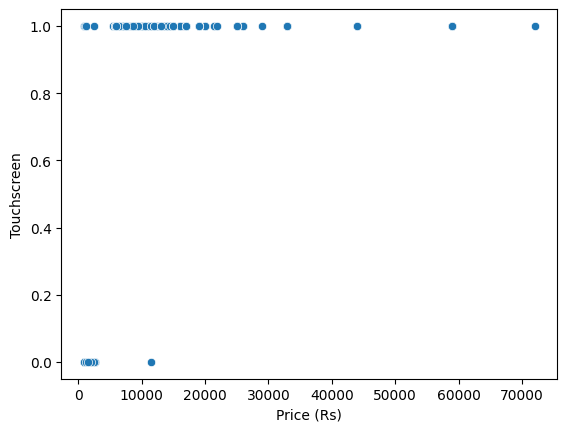

In [24]:
import seaborn as sns

sns.scatterplot(x='Price (Rs)',y="Touchscreen",data=df)

In [25]:
df[df["Touchscreen"].isnull()]

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
89,12872.781818,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [26]:
df.dropna(subset=["Touchscreen"],inplace=True)

In [27]:
df[df["Processor Core"].isnull()]

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
113,28999.0,2.0,1.0,NaN,NaN,128.0,6.0,1.0,1.0,1.0,...,0.0,1.0,4410.0,178.0,1.0,4.3,4.4,3.8,4.3,4.3


In [28]:
df.dropna(subset=["Processor Core"],inplace=True)

In [29]:
df[df["Internal Storage(GB)"].isnull()]

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
142,2190.0,2.0,0.0,1.0,208.0,NaN,3.0,0.0,0.0,0.0,...,1.0,0.0,800.0,74.98,0.0,4.3,2.9,4.1,3.9,4.0
161,2098.0,2.0,0.0,1.0,208.0,NaN,4.0,0.0,0.0,0.0,...,1.0,0.0,800.0,74.98,0.0,4.3,2.9,4.1,3.9,4.0


<AxesSubplot: xlabel='RAM (GB)', ylabel='Internal Storage(GB)'>

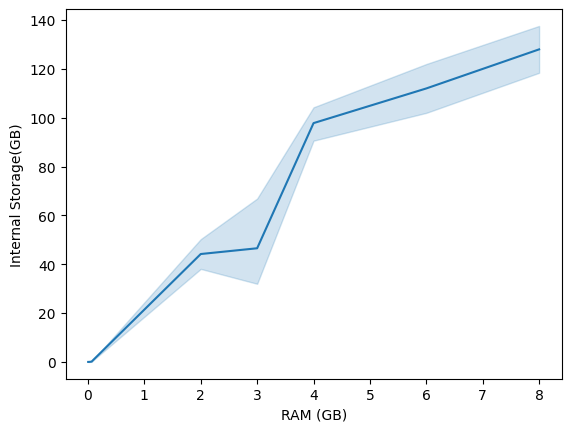

In [30]:
sns.lineplot(x=df["RAM (GB)"],y=df["Internal Storage(GB)"])

From the above graph we can see that as the size if RAM increases so does the the size of internal storage hence we can use this relationship to fill in missing values for Internal Storage and RAM

In [31]:
df.groupby(df["RAM (GB)"])["Internal Storage(GB)"].mean()

RAM (GB)
0.004      0.003333
0.032      0.032000
0.064      0.128000
2.000     44.190476
3.000     46.545455
4.000     97.797753
6.000    112.000000
8.000    128.000000
Name: Internal Storage(GB), dtype: float64

In [32]:
df.loc[142,"Internal Storage(GB)"] = 46.545455
df.loc[161,"Internal Storage(GB)"] = 97.797753
df["Internal Storage(GB)"].isnull().sum()

0

In [33]:
df[df["Primary Camera Available"].isnull()]

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
180,8490.0,2.0,1.0,8.0,2.2,32.0,3.0,NaN,NaN,NaN,...,0.0,NaN,5000.0,NaN,NaN,4.1,3.5,4.0,3.8,3.7


The above also has a alot of missing values so we will drop this row

In [34]:
df.dropna(subset=["Primary Camera Available"],inplace=True)

In [35]:
df[df["Full HD Recording"].isnull()]

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,...,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
201,32999.0,2.0,1.0,8.0,2.8,128.0,8.0,1.0,1.0,NaN,...,0.0,1.0,4600.0,180.0,1.0,4.4,4.5,4.1,4.7,4.7


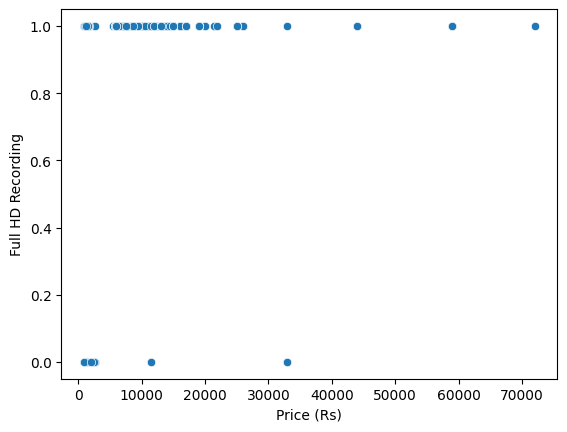

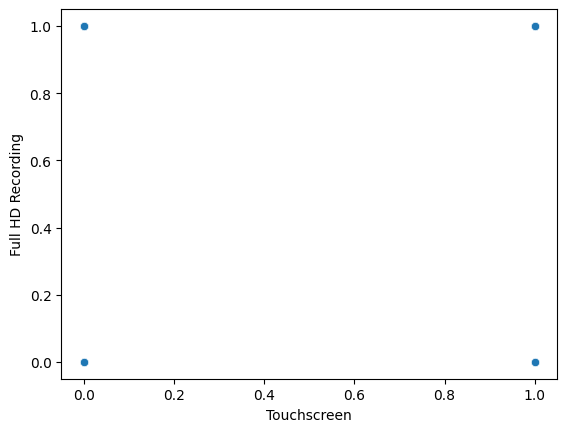

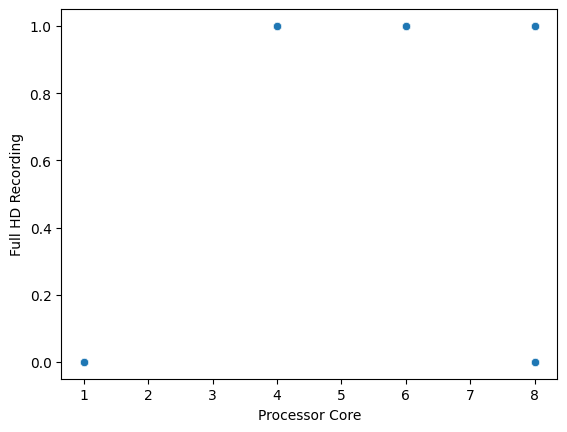

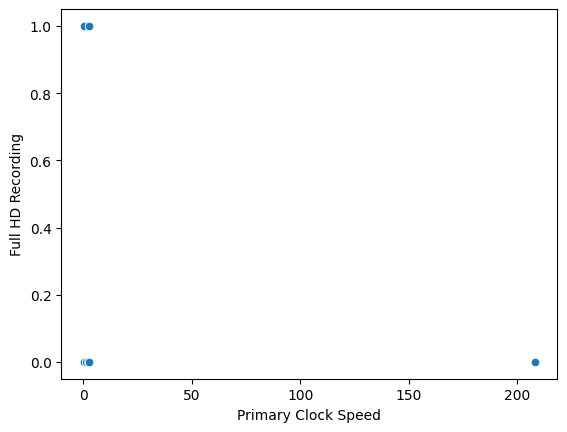

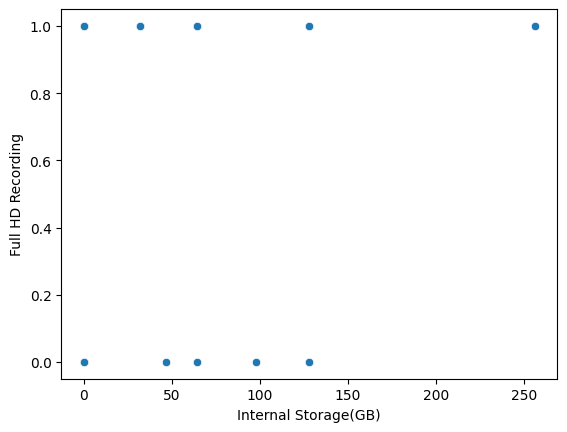

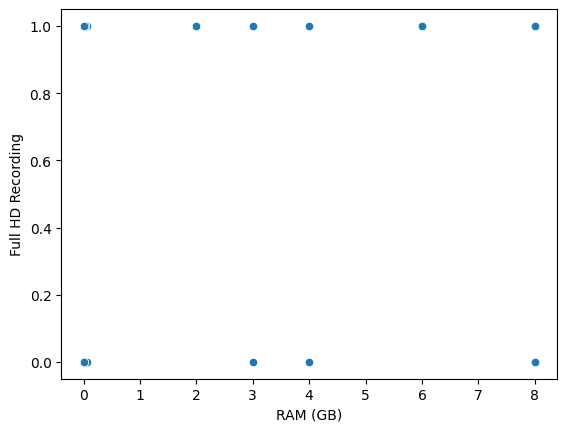

In [36]:
import matplotlib.pyplot as plt

for i,xaxis in enumerate(["Price (Rs)","Touchscreen","Processor Core","Primary Clock Speed","Internal Storage(GB)","RAM (GB)"]):
    plt.figure(i)
    sns.scatterplot(x=xaxis,y="Full HD Recording",data=df)

From the above graph we could'nt find any conclusive realtionship to fill in missing hence we will drop this row

In [37]:
df.dropna(subset=["Full HD Recording"],inplace=True)

In [38]:
pd.set_option("display.max_columns",None)
df[df["Bluetooth Support"].isnull()]

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
90,8499.0,2.0,1.0,8.0,2.3,64.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.3,3.8,4.2,4.1,4.0
91,8499.0,2.0,1.0,8.0,2.3,64.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.3,3.8,4.2,4.1,4.0
92,8499.0,2.0,1.0,8.0,2.3,64.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.3,3.8,4.2,4.1,4.0
93,8499.0,2.0,1.0,8.0,2.3,64.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.3,3.8,4.2,4.1,4.0
94,58999.0,2.0,1.0,6.0,2.3,128.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.7,4.6,4.4,4.7,4.6
95,10499.0,2.0,1.0,6.0,2.3,128.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.4,0.0,0.0,0.0,0.0
96,10499.0,2.0,1.0,6.0,2.3,128.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.4,0.0,0.0,0.0,0.0
97,9999.0,2.0,1.0,6.0,2.3,128.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.4,3.6,4.0,3.9,4.2
98,9999.0,2.0,1.0,6.0,2.3,128.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.4,3.6,4.0,3.9,4.2
99,9999.0,2.0,1.0,6.0,2.3,128.0,4.0,1.0,1.0,1.0,NaN,1.0,0.0,1.0,6000.0,0.192,NaN,4.4,3.6,4.0,3.9,4.2


The mean value for blutooth is 0.96 and mean value for domestic warranty is 0.98 since both are nearly equal to one we will fill missing values with one

In [39]:
df["Bluetooth Support"].fillna(1,inplace=True)
df["Bluetooth Support"].isnull().sum()

0

In [40]:
df["Domestic Warranty(Years)"].fillna(1,inplace=True)
df["Domestic Warranty(Years)"].isnull().sum()

0

In [41]:
df[df["Wi-Fi"].isnull()]

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
156,16999.0,2.0,1.0,8.0,2.4,128.0,6.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,5000.0,187.0,1.0,4.3,3.9,4.1,4.1,4.2
157,14999.0,2.0,1.0,8.0,2.4,64.0,4.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,5000.0,187.0,1.0,4.5,3.9,4.1,4.1,4.3
158,14999.0,2.0,1.0,8.0,2.4,64.0,4.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,5000.0,187.0,1.0,4.5,3.9,4.1,4.1,4.3


We will check what values does other mobile devices with same specifications have

In [42]:
df[(df["No of Sim"]==2.0) & (df["Touchscreen"]==1) & (df["Processor Core"]==8) & (df["Primary Clock Speed"]==2.4)]

,Price (Rs),No of Sim,Touchscreen,Processor Core,Primary Clock Speed,Internal Storage(GB),RAM (GB),Primary Camera Available,Secondary Camera Available,Full HD Recording,Bluetooth Support,Wi-Fi,Audio Jack,GPS Support,Batter Capacity(mAh),Weight (gms),Domestic Warranty(Years),Product Rating,Camera Rating,Battery Rating,Display Rating,Design Rating
3,9999.000000,2.0,1.0,8.0,2.4,64.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.0,203.0,1.0,4.3,3.6,4.1,3.9,3.9
23,9999.000000,2.0,1.0,8.0,2.4,64.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.0,203.0,1.0,4.3,3.6,4.1,3.9,3.9
30,14490.000000,2.0,1.0,8.0,2.4,128.0,4.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,6000.0,205.0,1.0,4.2,3.7,4.4,3.9,3.7
39,12999.000000,2.0,1.0,8.0,2.4,128.0,6.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5000.0,169.0,1.0,4.2,3.5,4.2,4.4,4.2
42,11999.000000,2.0,1.0,8.0,2.4,128.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5000.0,180.0,1.0,4.1,3.6,4.1,4.0,4.0
60,15999.000000,2.0,1.0,8.0,2.4,128.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5000.0,195.0,1.0,4.2,3.6,4.0,4.0,4.0
61,8299.000000,2.0,1.0,8.0,2.4,128.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5000.0,195.0,1.0,4.4,3.6,4.3,4.0,4.1
62,12999.000000,2.0,1.0,8.0,2.4,128.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5000.0,195.0,1.0,4.2,3.5,4.2,4.4,4.2
63,11442.000000,2.0,1.0,8.0,2.4,128.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5000.0,195.0,1.0,4.2,3.5,4.1,3.9,3.9
64,6499.000000,2.0,1.0,8.0,2.4,128.0,8.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,5000.0,195.0,1.0,4.2,3.2,3.9,3.8,3.7


From the above table we can see that all the devices with same specification have Wi-Fi Support so we will fill missing values with 1

In [43]:
df["Wi-Fi"].fillna(1,inplace=True)
df["Wi-Fi"].isnull().sum()

0

In [44]:
df.isnull().sum()

Price (Rs)                    0
No of Sim                     0
Touchscreen                   0
Processor Core                0
Primary Clock Speed           0
Internal Storage(GB)          0
RAM (GB)                      0
Primary Camera Available      0
Secondary Camera Available    0
Full HD Recording             0
Bluetooth Support             0
Wi-Fi                         0
Audio Jack                    0
GPS Support                   0
Batter Capacity(mAh)          0
Weight (gms)                  0
Domestic Warranty(Years)      0
Product Rating                0
Camera Rating                 0
Battery Rating                0
Display Rating                0
Design Rating                 0
dtype: int64

Now we have cleaned out numeric data and it is ready for analysis